Chapter 31
Working with time series




In [1]:
%reset -f

In [2]:
import pandas as pd 


In [3]:

url = 'https://github.com/mattharrison/datasets/raw/master/data/dirtydevil.txt'

df = pd.read_csv(url, skiprows = lambda num:num <34 or num ==35, sep='\t')



C:\Users\wgrom\AppData\Local\Temp\ipykernel_15960\3621518455.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows = lambda num:num <34 or num ==35, sep='\t')


Web site with the actual data
https://waterdata.usgs.gov/nwis/uv?search_criteria=state_cd&submitted_form=introduction


https://waterdata.usgs.gov/nwis/uv/?cb_00060=on&cb_00065=on-&format=rdb&site_no=09333500&period=&begin_date-=2000-01-01&end_date=2020-09-28

Need to try downloading data.  Author has a url in book, and there is also a manual web page to download



In [4]:
def tweak_river(df_):
    return (df_
            .assign(datetime=pd.to_datetime(df_.datetime))
            .rename(columns={'144166_00060':'cfs','144167_00065':'gage_height'})
            .set_index('datetime')
           )

In [5]:
dd = tweak_river(df)

In [6]:
dd.dtypes

agency_cd           object
site_no              int64
tz_cd               object
cfs                float64
144166_00060_cd     object
gage_height        float64
144167_00065_cd     object
dtype: object

In [7]:
dd

,agency_cd,site_no,tz_cd,cfs,144166_00060_cd,gage_height,144167_00065_cd
datetime,,,,,,,
2001-05-07 01:00:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:15:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:30:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:45:00,USGS,9333500,MDT,70.00,A:[91],NaN,NaN
2001-05-07 02:00:00,USGS,9333500,MDT,70.00,A:[91],NaN,NaN
...,...,...,...,...,...,...,...
2020-09-28 08:30:00,USGS,9333500,MDT,9.53,P,6.16,P
2020-09-28 08:45:00,USGS,9333500,MDT,9.20,P,6.15,P
2020-09-28 09:00:00,USGS,9333500,MDT,9.20,P,6.15,P


In [8]:
def tweak_river2(df_):
    return (df_
            .assign(datetime=lambda df_:
                pd.to_datetime(df_.datetime + " " +
                    df_.tz_cd.str.replace('MST','-0700')
                       .str.replace('MDT','-0600'),
                    format='%Y-%m-%d %H:%M %z', utc=True))
            .rename(columns={'144166_00060':'cfs',
                             '144167_00065':'gage_height'})
            .set_index('datetime')
           )

In [9]:
dd = tweak_river2(df)

In [10]:
dd

,agency_cd,site_no,tz_cd,cfs,144166_00060_cd,gage_height,144167_00065_cd
datetime,,,,,,,
2001-05-07 07:00:00+00:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 07:15:00+00:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 07:30:00+00:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 07:45:00+00:00,USGS,9333500,MDT,70.00,A:[91],NaN,NaN
2001-05-07 08:00:00+00:00,USGS,9333500,MDT,70.00,A:[91],NaN,NaN
...,...,...,...,...,...,...,...
2020-09-28 14:30:00+00:00,USGS,9333500,MDT,9.53,P,6.16,P
2020-09-28 14:45:00+00:00,USGS,9333500,MDT,9.20,P,6.15,P
2020-09-28 15:00:00+00:00,USGS,9333500,MDT,9.20,P,6.15,P


In [11]:
def to_america_denver_time(df_, time_col, tz_col):
    return(df_
           .assign(**{tz_col: df_[tz_col].replace('MDT','MST7MDT')})
           .groupby(tz_col)
           [time_col]
           .transform(lambda s:pd.to_datetime(s)
                      .dt.tz_localize(s.name, ambiguous=True)
                      .dt.tz_convert('America/Denver'))
           )
    

def tweak_river3(df_):
    return(df_
           .assign(datetime=to_america_denver_time(df_, 'datetime',
                    'tz_cd'))
           .rename(columns={'144166_00060':'cfs',
                            '144167_00065': 'gage_height'})
           .set_index('datetime')
          )
    
    
dd = tweak_river3(df)


In [12]:
dd

,agency_cd,site_no,tz_cd,cfs,144166_00060_cd,gage_height,144167_00065_cd
datetime,,,,,,,
2001-05-07 01:00:00-06:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:15:00-06:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:30:00-06:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:45:00-06:00,USGS,9333500,MDT,70.00,A:[91],NaN,NaN
2001-05-07 02:00:00-06:00,USGS,9333500,MDT,70.00,A:[91],NaN,NaN
...,...,...,...,...,...,...,...
2020-09-28 08:30:00-06:00,USGS,9333500,MDT,9.53,P,6.16,P
2020-09-28 08:45:00-06:00,USGS,9333500,MDT,9.20,P,6.15,P
2020-09-28 09:00:00-06:00,USGS,9333500,MDT,9.20,P,6.15,P


<AxesSubplot: xlabel='datetime'>

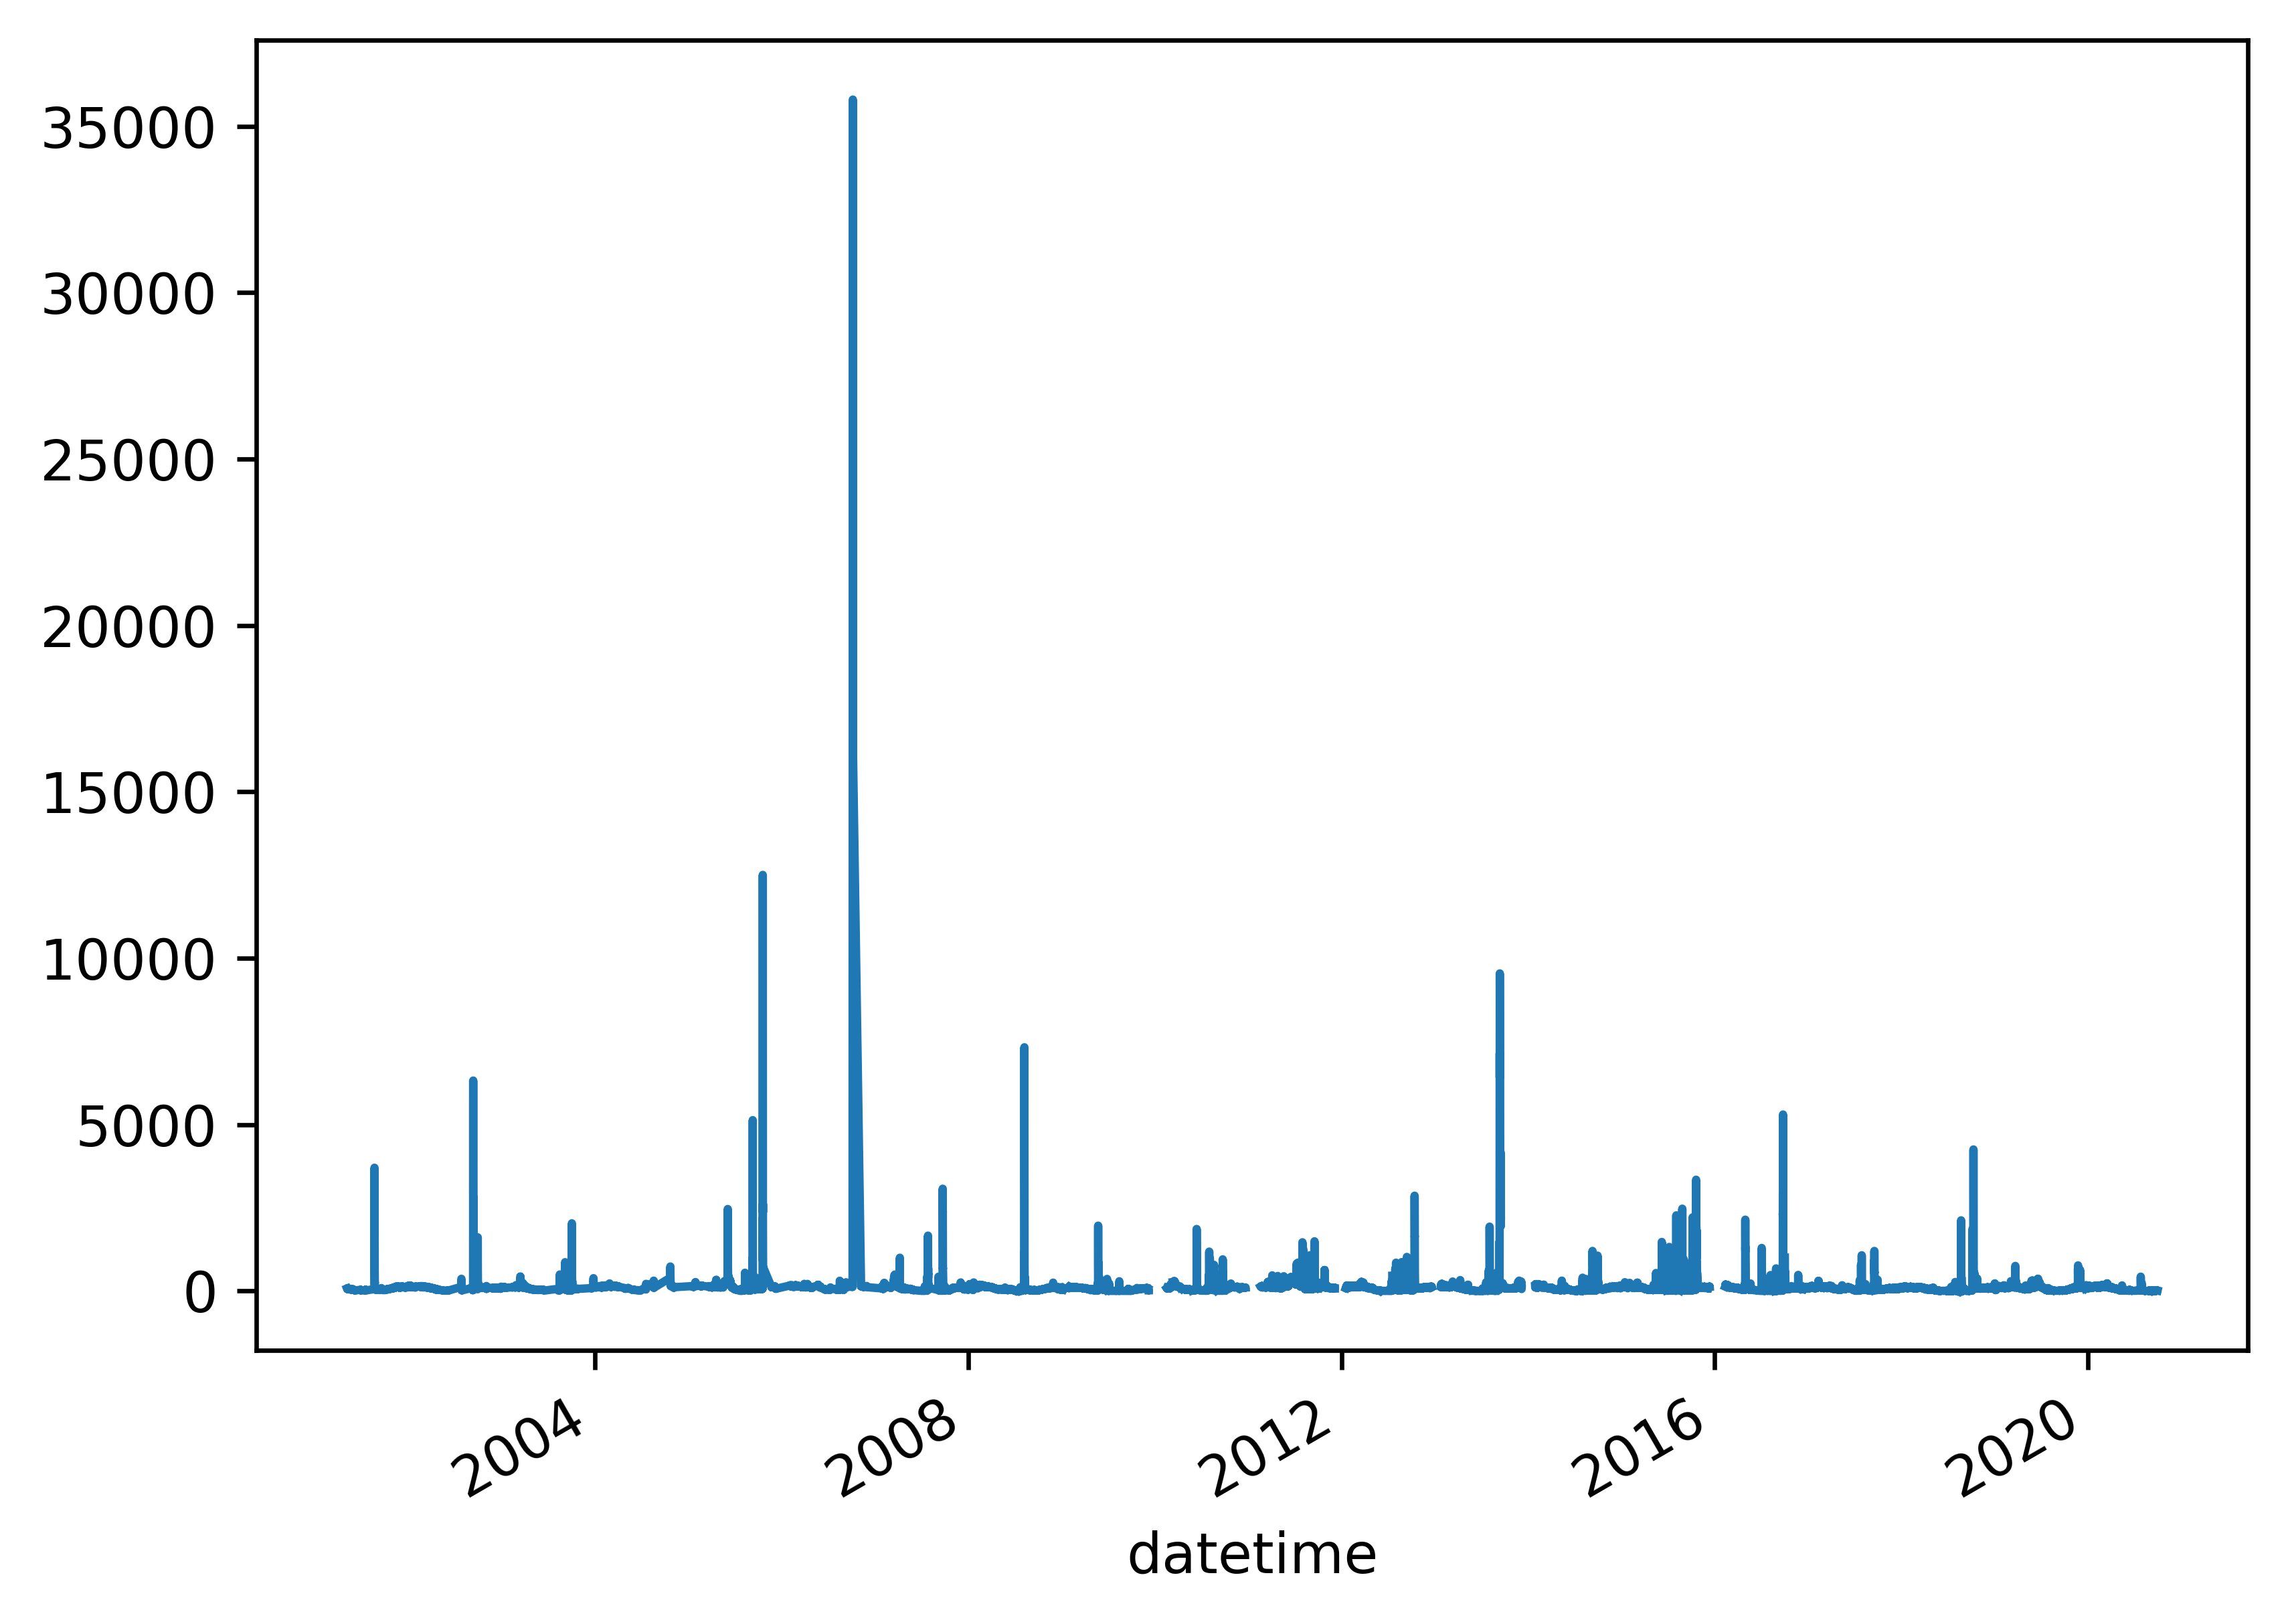

In [26]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(dpi=600)
dd.cfs.plot()

In [14]:
dd.cfs.describe()

count    493124.000000
mean        104.460537
std         477.341329
min           0.000000
25%          34.700000
50%          81.000000
75%         115.000000
max       35800.000000
Name: cfs, dtype: float64

In [15]:
(dd
 .cfs
 .loc['2018']
)

datetime
2018-01-01 00:00:00-07:00     92.8
2018-01-01 00:15:00-07:00     88.3
2018-01-01 00:30:00-07:00     90.5
2018-01-01 00:45:00-07:00     90.5
2018-01-01 01:00:00-07:00     94.0
                             ...  
2018-12-31 22:45:00-07:00    117.0
2018-12-31 23:00:00-07:00    116.0
2018-12-31 23:15:00-07:00    113.0
2018-12-31 23:30:00-07:00    112.0
2018-12-31 23:45:00-07:00    112.0
Name: cfs, Length: 35034, dtype: float64

In [16]:
(dd
 .cfs 
 .loc['2018/3':'2018/5']
)

datetime
2018-03-01 00:00:00-07:00    104.00
2018-03-01 00:15:00-07:00    107.00
2018-03-01 00:30:00-07:00    107.00
2018-03-01 00:45:00-07:00    105.00
2018-03-01 01:00:00-07:00    103.00
                              ...  
2018-05-31 22:45:00-06:00      1.01
2018-05-31 23:00:00-06:00      1.11
2018-05-31 23:15:00-06:00      1.11
2018-05-31 23:30:00-06:00      1.01
2018-05-31 23:45:00-06:00      1.01
Name: cfs, Length: 8828, dtype: float64

<AxesSubplot: xlabel='datetime'>

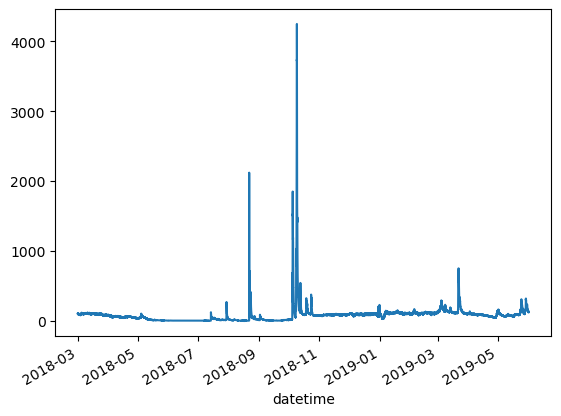

In [17]:
(dd
 .cfs 
 .loc['2018/3':'2019/5']
 .plot()
)

<AxesSubplot: xlabel='datetime'>

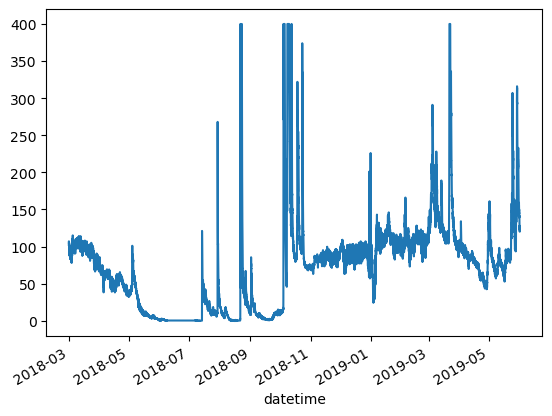

In [18]:
(dd
 .cfs 
 .loc['2018/3':'2019/5']
 .clip(upper=400)
 .plot()
)

In [20]:
dd2018 = (dd
 .cfs 
 .loc['2018/3':'2019/5']
 .clip(upper=400)
)

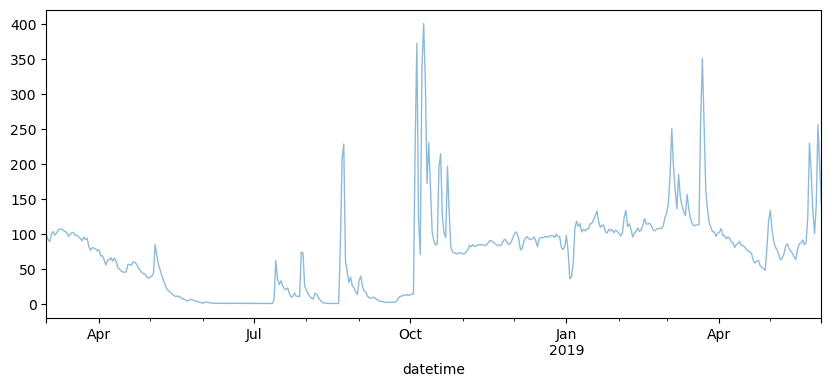

In [21]:
ax = (dd2018
      .resample('D')
      .mean()
      .plot(figsize=(10,4), alpha=.5, linewidth=1, label='Daily')
     )

Text(0.5, 1.0, 'Dirty Devil Flow 2018 (cfs)')

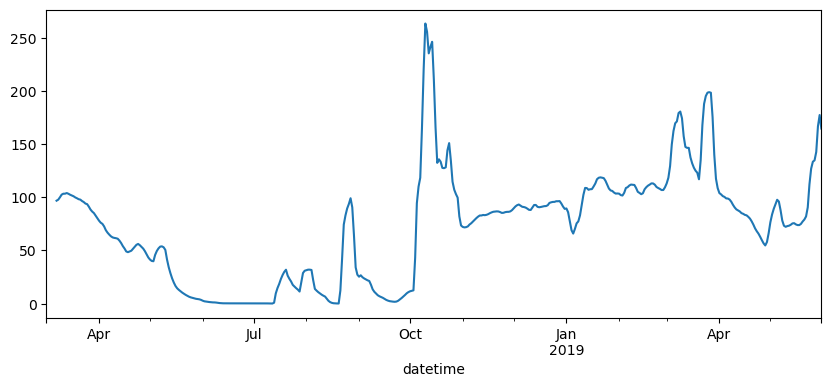

In [28]:
# this doesn't plot , no errors?

bb = (dd2018
      .resample('D')
      .mean()
      .rolling(7)
      .mean()
      .plot(figsize=(10,4),  label='7-day Rolling' )  # book has ax=ax and the plot doesn't show!
     )

ax.legend()
ax.set_title('Dirty Devil Flow 2018 (cfs)')


31.5 Missing Timeseries Data

In [30]:
(dd
 [['cfs']]                                # double brackets outputs a dataframe instead of series
 .query('cfs.isna()'))

,cfs
datetime,
2007-12-15 00:00:00-07:00,NaN
2007-12-15 00:15:00-07:00,NaN
2007-12-15 00:30:00-07:00,NaN
2007-12-15 00:45:00-07:00,NaN
2007-12-15 01:00:00-07:00,NaN
...,...
2020-09-12 00:15:00-06:00,NaN
2020-09-12 00:30:00-06:00,NaN
2020-09-12 00:45:00-06:00,NaN


<AxesSubplot: xlabel='datetime'>

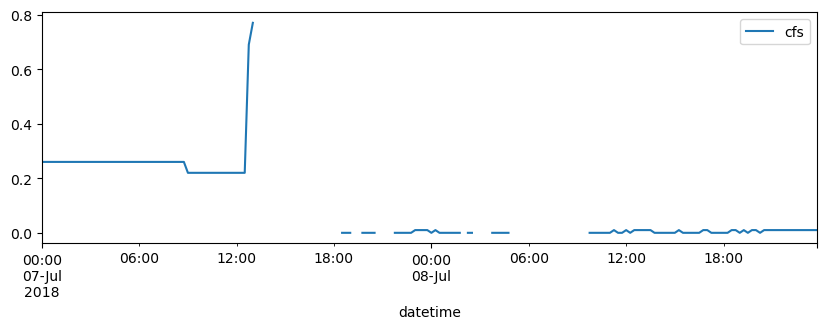

In [31]:
(dd
 [['cfs']]
 .loc['2018/7/7':'2018/7/8']
 .plot(figsize=(10,3))
)

Text(0.5, 1.0, 'Missing Values Demo')

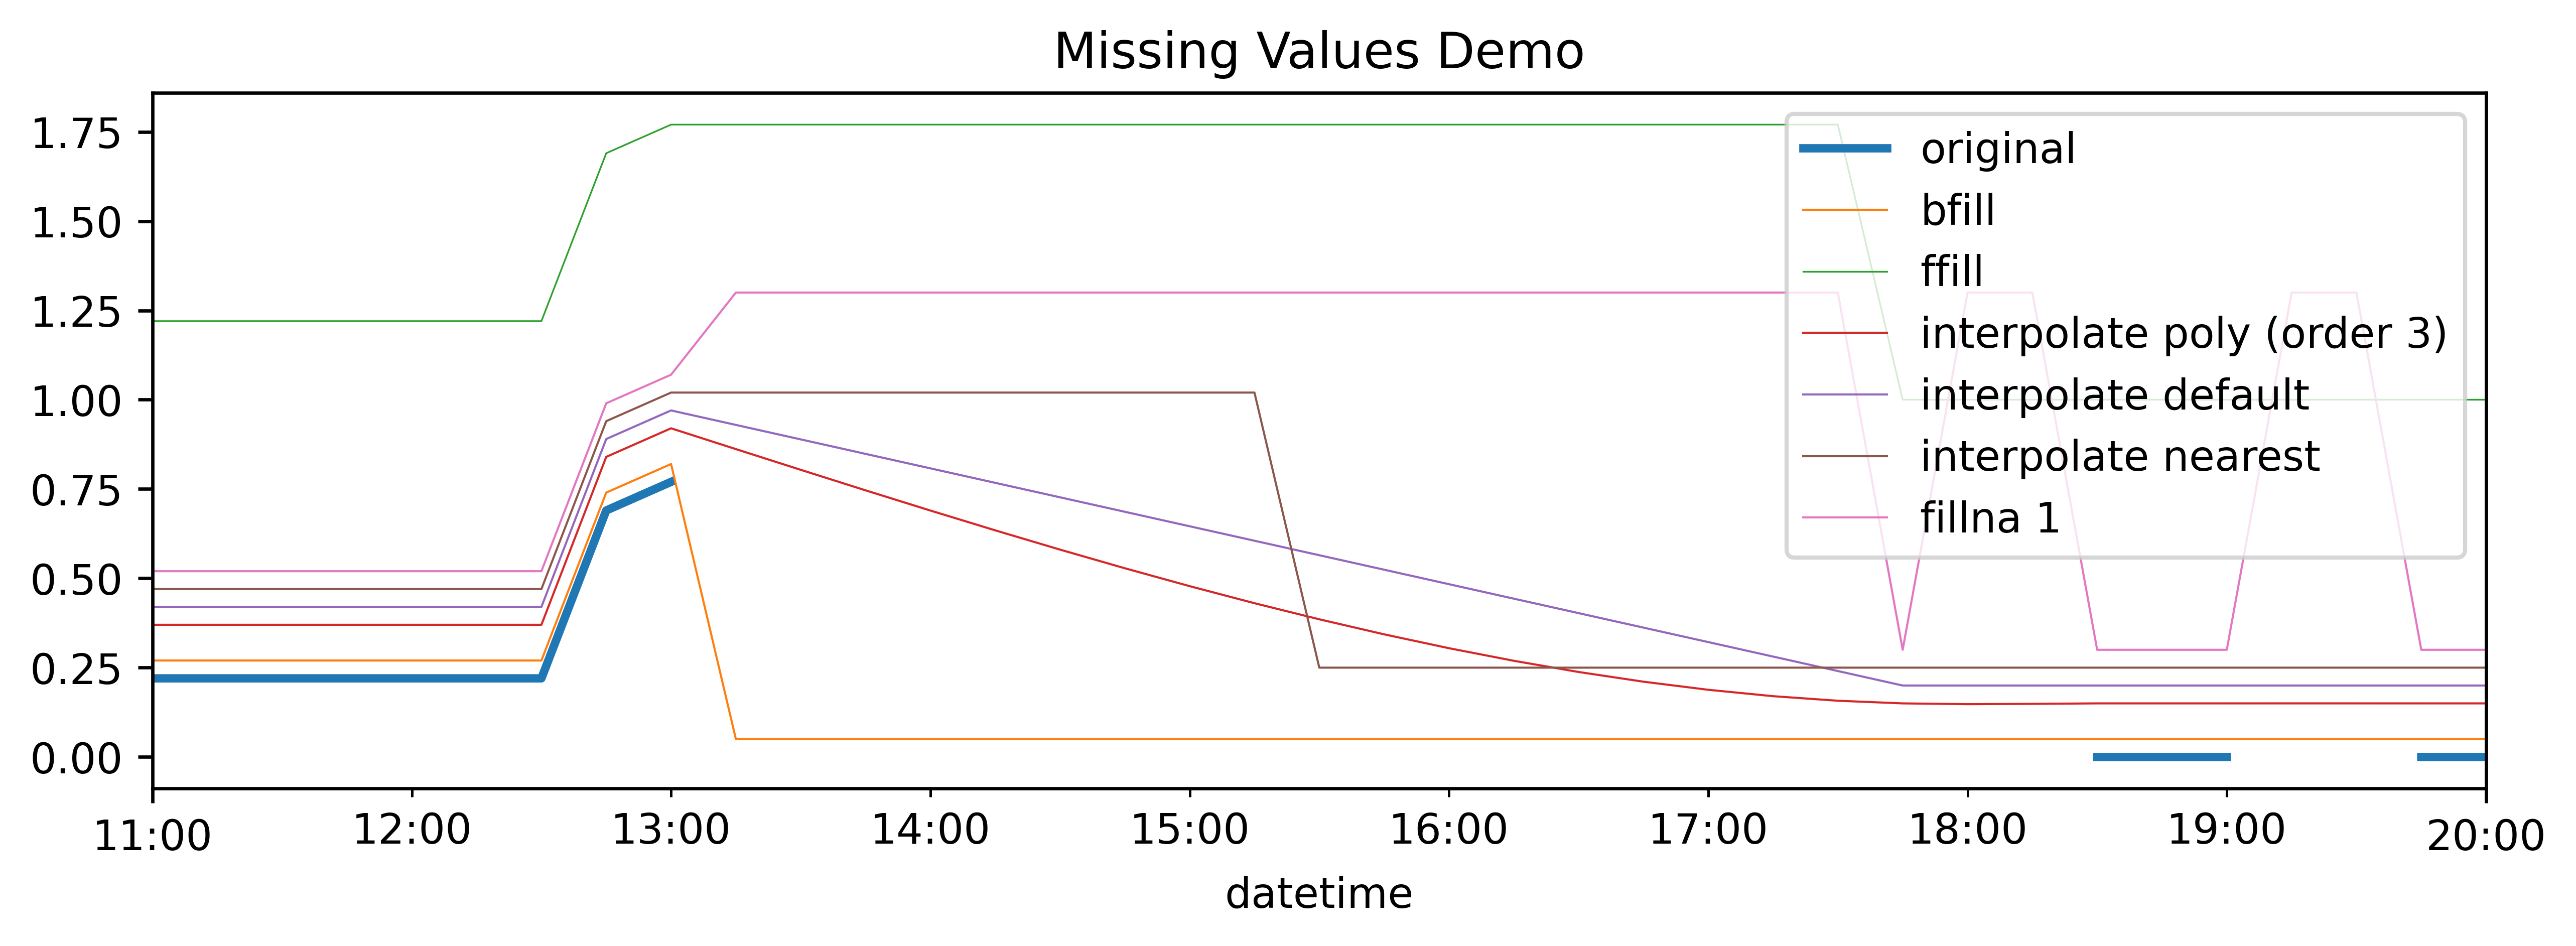

In [45]:
fix, ax = plt.subplots(dpi=600, figsize=(10,3))
dd_july = (dd
           ['cfs']
           .loc['2018/7/7 11:00':'2018/7/7 20:00']
        )

dd_july.plot(ax=ax, label='original', linewidth=2)

(dd_july
 .bfill()
 .add(.05)
 .plot(label='bfill',  ax=ax,linewidth=.5))  

(dd_july
 .ffill()
 .add(1)
 .plot(label='ffill', ax=ax, linewidth=.4))  


(dd_july
 .interpolate(method='polynomial', order=3)
 .add(.15)
 .plot(label='interpolate poly (order 3)',ax=ax,  linewidth=.5))   

(dd_july
 .interpolate()
 .add(.2)
 .plot(label='interpolate default',ax=ax,  linewidth=.5)) 


(dd_july
 .interpolate(method='nearest')
 .add(.25)
 .plot(label='interpolate nearest', ax=ax, linewidth=.5)) 

(dd_july
 .fillna(1)
 .add(.3)
 .plot(label='fillna 1', ax=ax, linewidth=.5))  


ax.legend()
ax.set_title('Missing Values Demo')


In [46]:
(dd
 .groupby(dd.index.month)
 .cfs
 .describe()
)

,count,mean,std,min,25%,50%,75%,max
datetime,,,,,,,,
1,26011.0,117.268802,29.000354,24.30,101.00,114.0,132.0,265.0
2,41309.0,125.890293,24.280297,56.00,109.00,125.0,141.0,303.0
3,51807.0,127.037609,48.885942,60.30,100.00,116.0,136.0,750.0
4,50669.0,82.786214,74.133528,20.50,52.50,70.0,97.8,2140.0
5,49507.0,63.007851,68.791835,0.31,27.20,43.9,78.5,1960.0
6,41379.0,74.327241,139.857378,0.02,8.93,32.0,82.5,2460.0
7,37089.0,62.775011,115.285805,0.00,4.25,17.4,68.2,1660.0
8,37584.0,74.676246,247.800553,0.00,6.30,25.6,59.1,7320.0
9,42272.0,128.309332,546.921269,0.00,7.55,20.0,55.9,9540.0


<AxesSubplot: xlabel='datetime'>

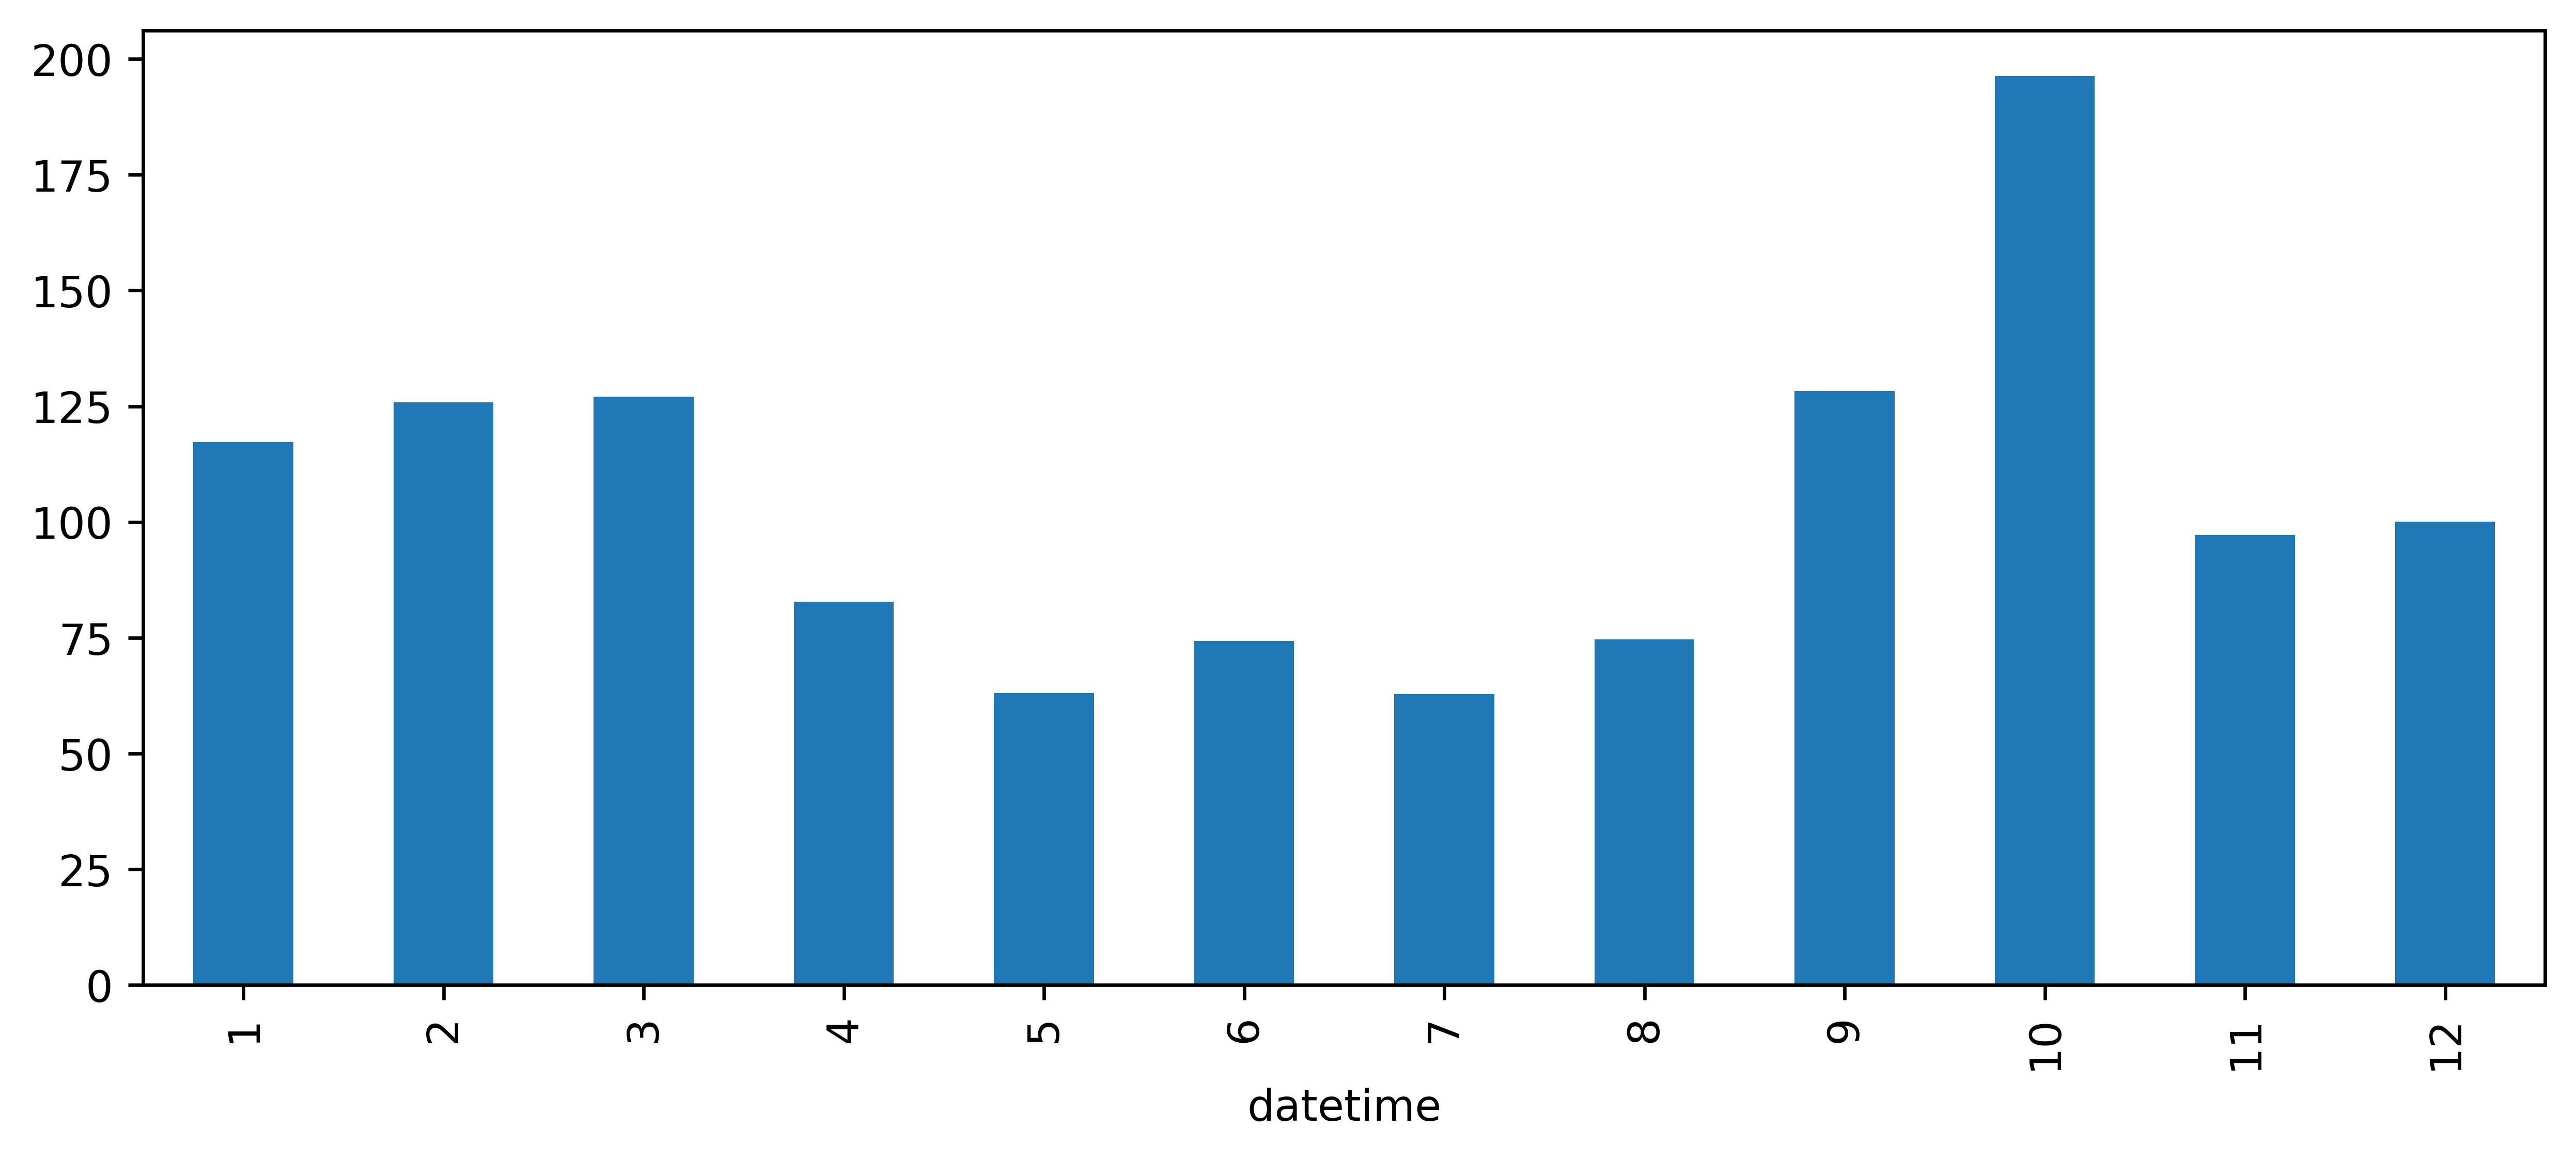

In [49]:
fig, ax = plt.subplots(dpi=600, figsize=(10,4))

(dd
 .groupby(dd.index.month)
 ['cfs']
 .describe()
 ['mean']
 .plot.bar(ax=ax)
)

<AxesSubplot: xlabel='datetime'>

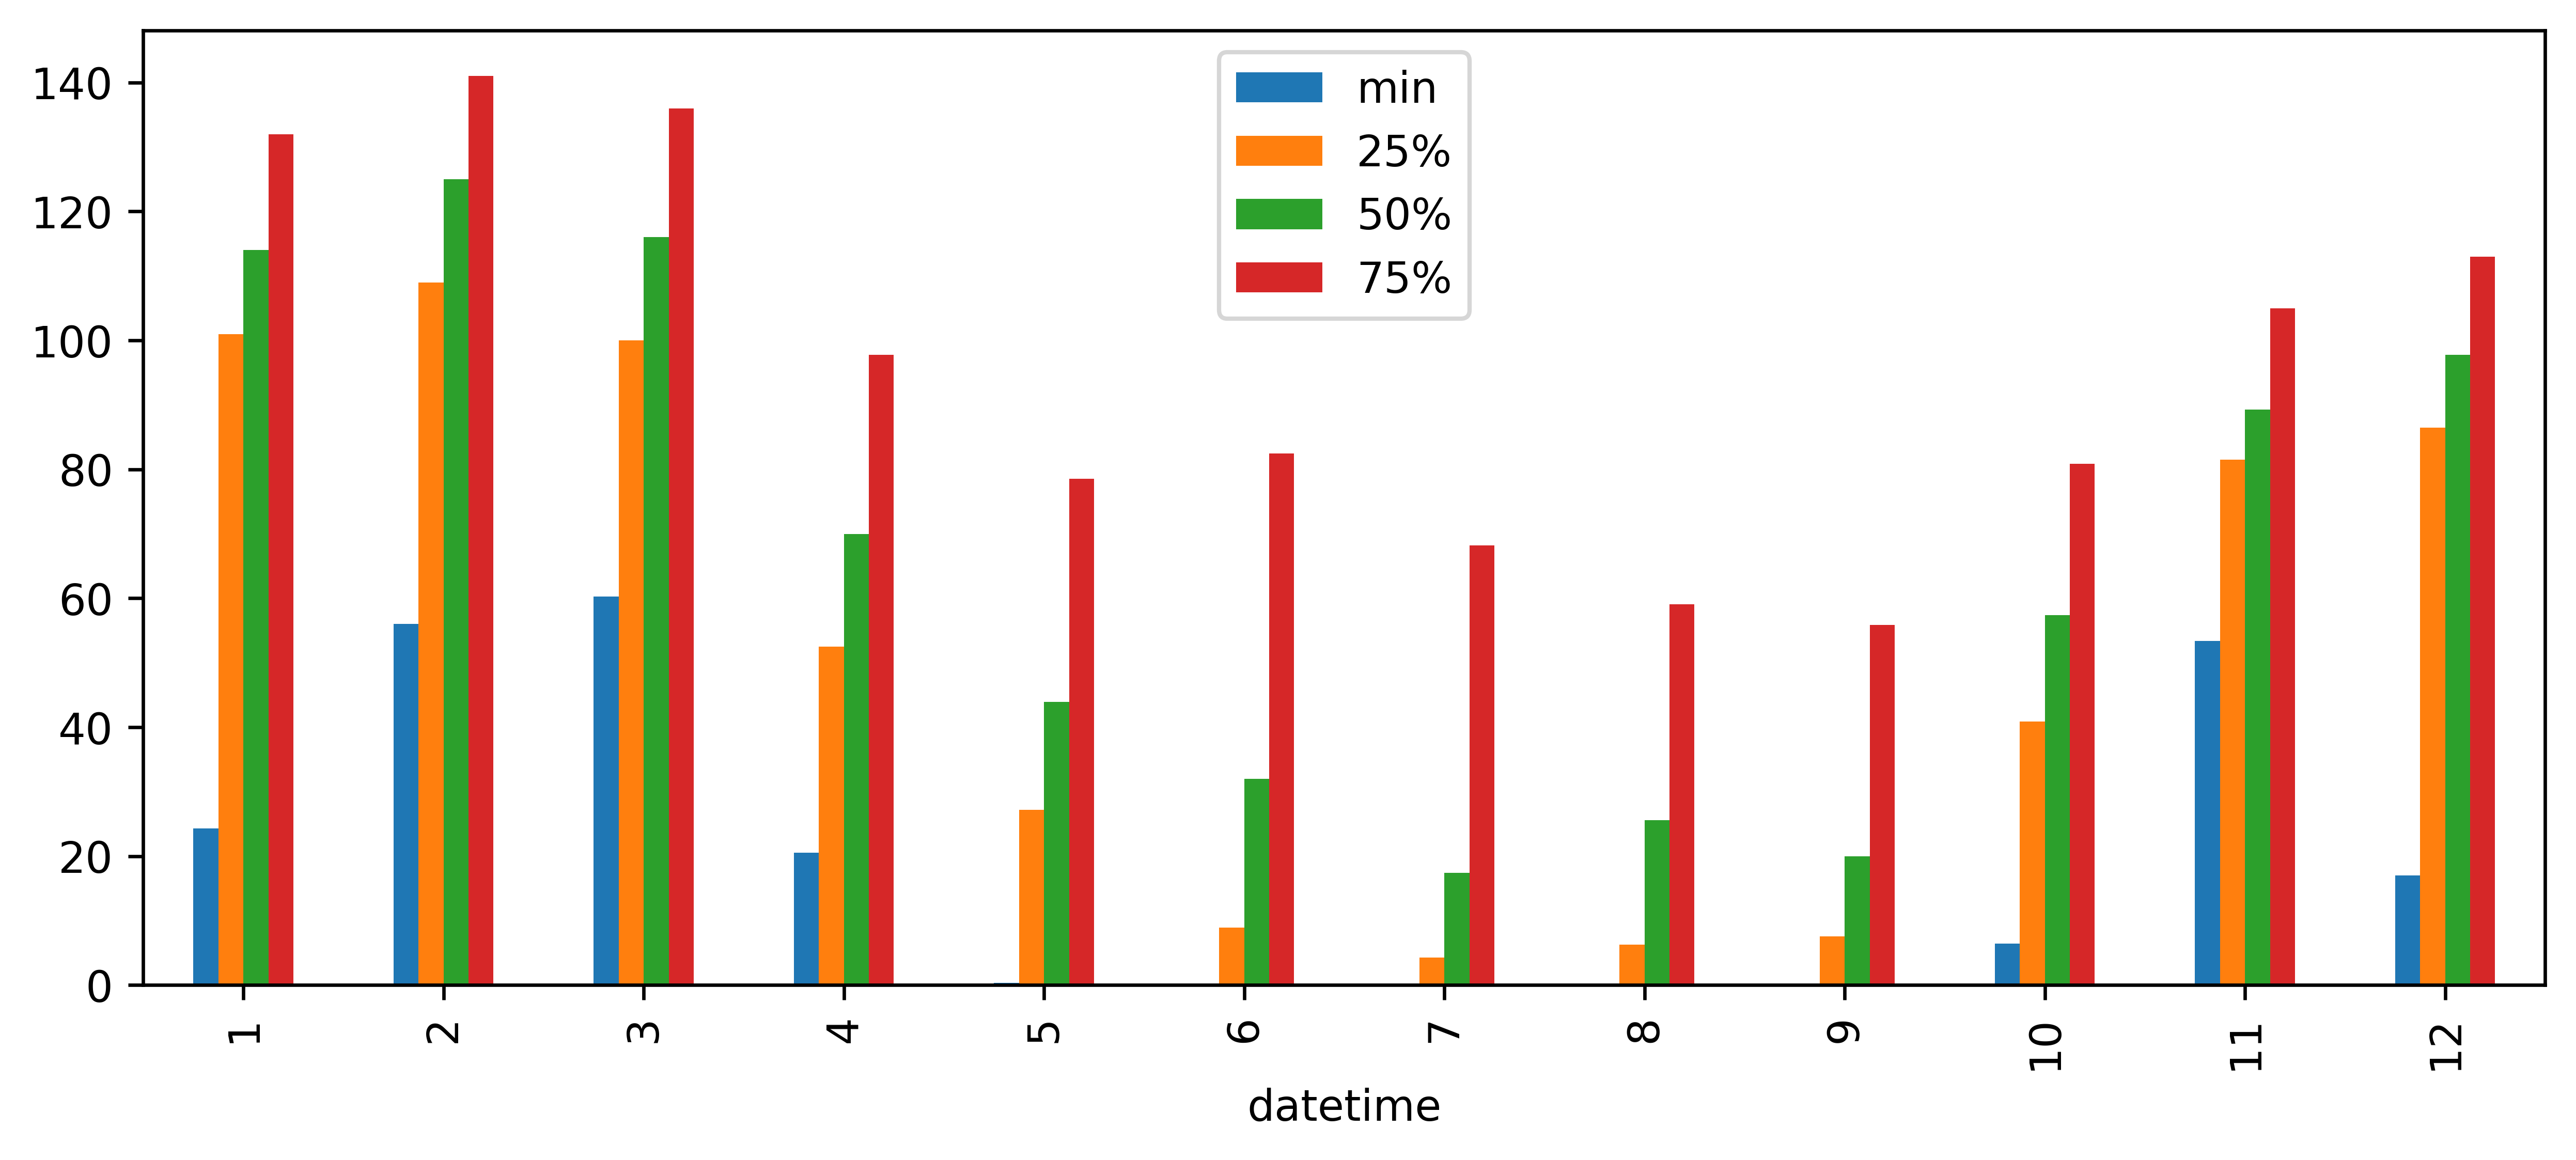

In [50]:
fig, ax = plt.subplots(dpi=600, figsize=(10,4))
(dd
 .groupby(dd.index.month)
 ['cfs']
 .describe()
 .loc[:, 'min':'75%']
 .plot.bar(ax=ax)
)

<AxesSubplot: xlabel='Month', ylabel='cfs'>

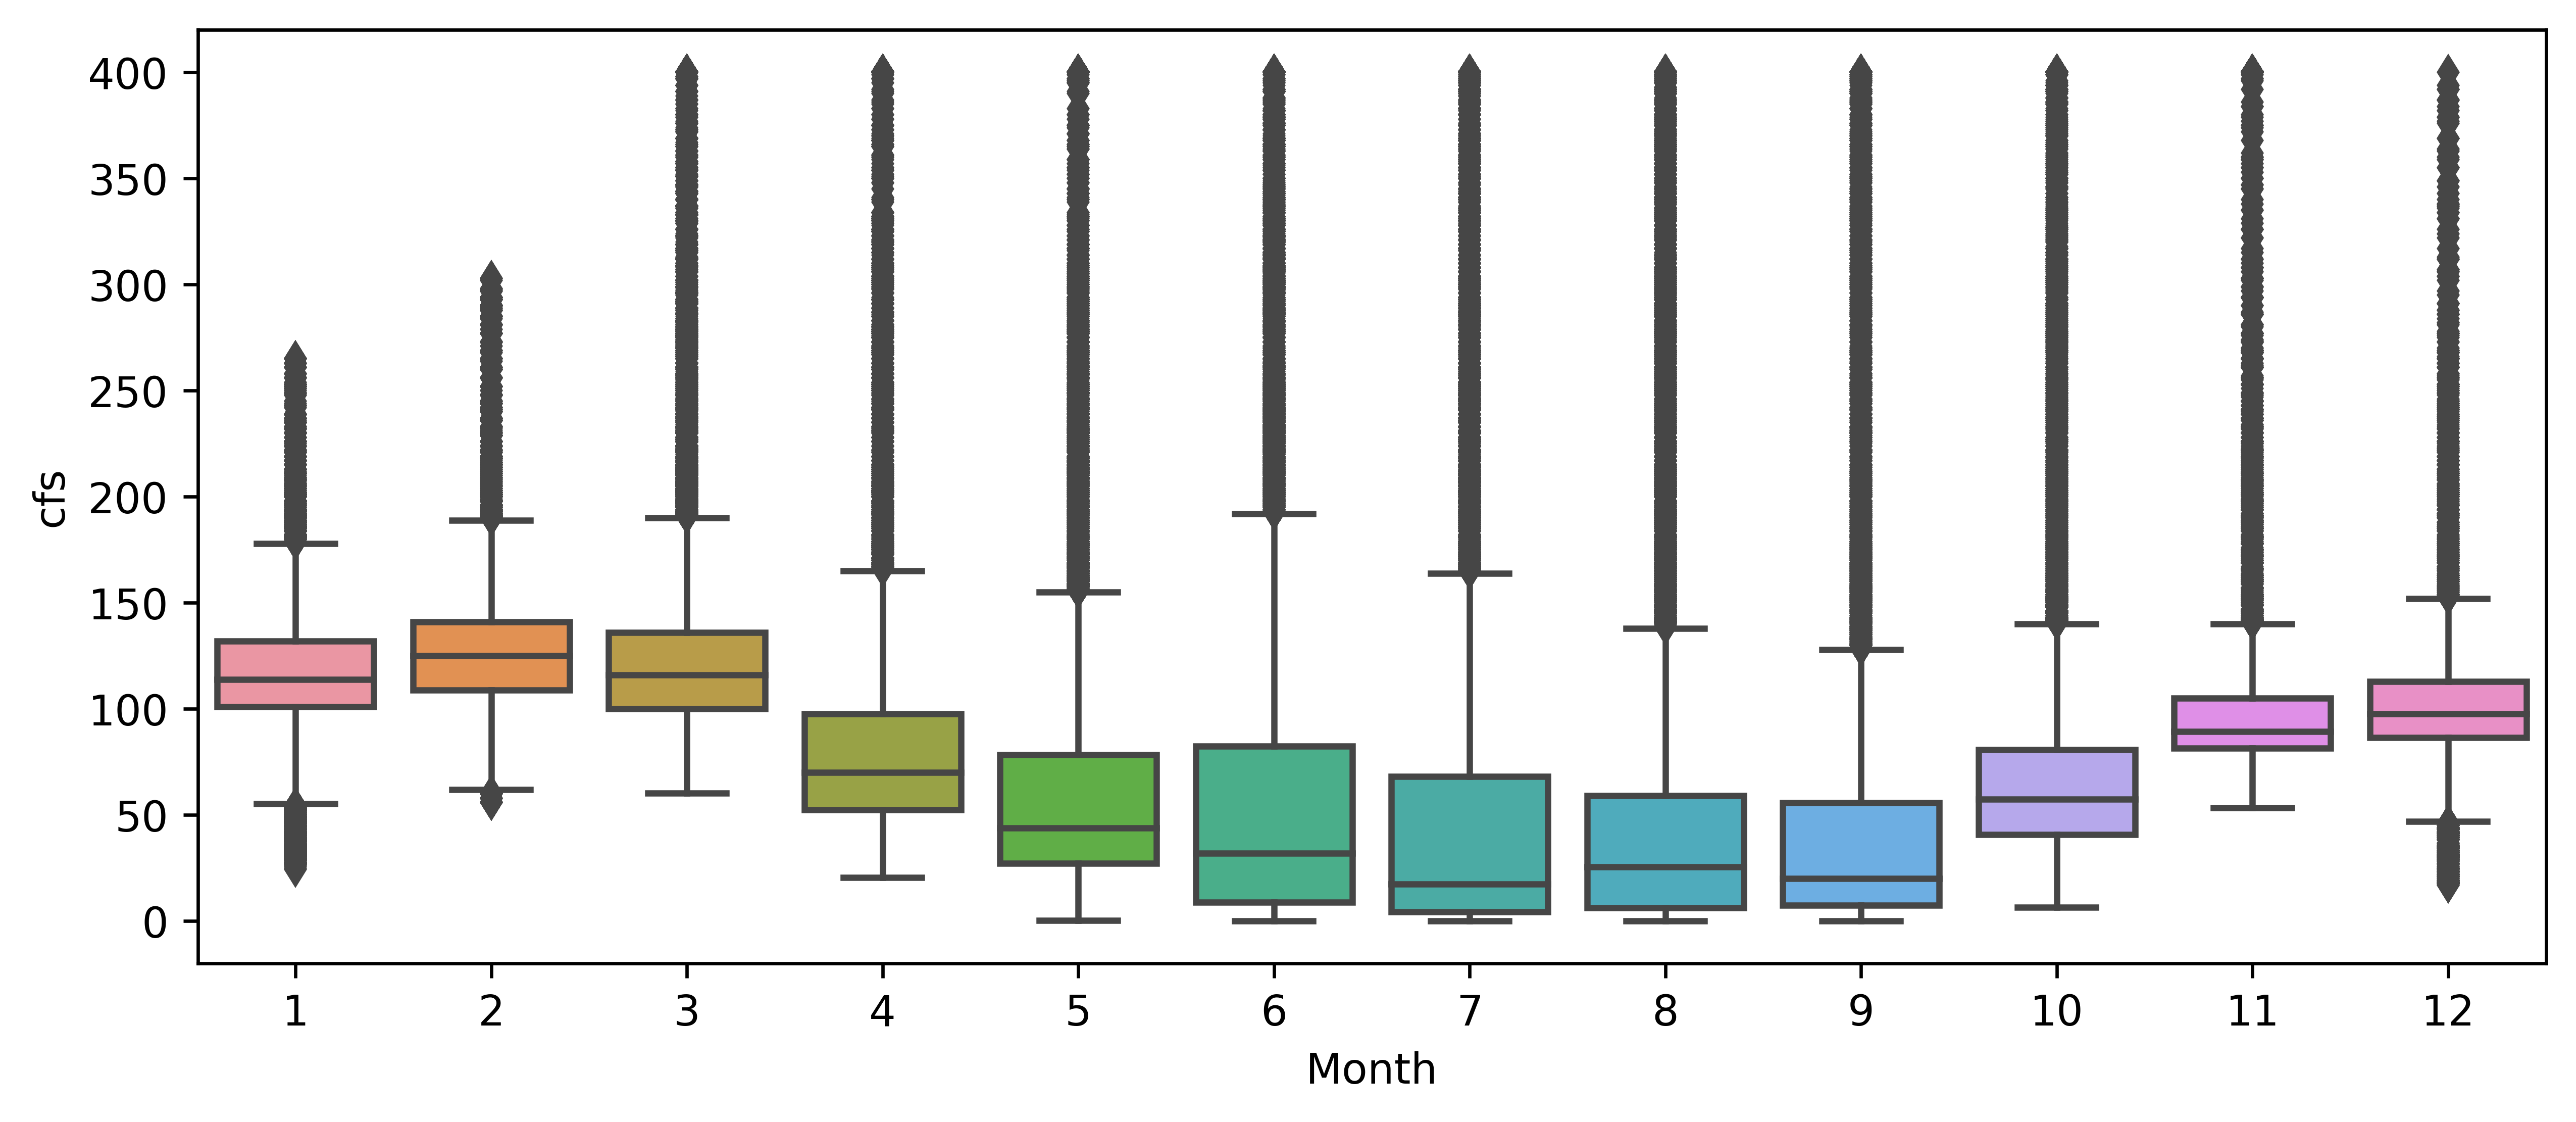

In [51]:
import seaborn as sns
fx, ax = plt.subplots(dpi=600, figsize=(10,4))
sns.boxplot(data=dd.assign(cfs=dd.cfs.clip(upper=400)),
            x=dd.index.month.rename('Month'), y='cfs', ax=ax)

31.7 Resampling Data

In [52]:
dd.cfs

datetime
2001-05-07 01:00:00-06:00    71.00
2001-05-07 01:15:00-06:00    71.00
2001-05-07 01:30:00-06:00    71.00
2001-05-07 01:45:00-06:00    70.00
2001-05-07 02:00:00-06:00    70.00
                             ...  
2020-09-28 08:30:00-06:00     9.53
2020-09-28 08:45:00-06:00     9.20
2020-09-28 09:00:00-06:00     9.20
2020-09-28 09:15:00-06:00     9.20
2020-09-28 09:30:00-06:00     9.20
Name: cfs, Length: 539305, dtype: float64

In [53]:
# what is resample() - Convenience method for frequency conversion and resampling of time series. 
# The object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), 
# or the caller must pass the label of a datetime-like series/index to the on/level keyword parameter.
(dd
 .resample('D')
 .median()
)

,site_no,cfs,gage_height
datetime,,,
2001-05-07 00:00:00-06:00,9333500.0,71.50,NaN
2001-05-08 00:00:00-06:00,9333500.0,69.00,NaN
2001-05-09 00:00:00-06:00,9333500.0,63.50,NaN
2001-05-10 00:00:00-06:00,9333500.0,55.00,NaN
2001-05-11 00:00:00-06:00,9333500.0,55.00,NaN
...,...,...,...
2020-09-24 00:00:00-06:00,9333500.0,9.53,6.16
2020-09-25 00:00:00-06:00,9333500.0,10.20,6.18
2020-09-26 00:00:00-06:00,9333500.0,10.90,6.20


31.8 Rules with Offset Aliases

In [ ]:
(dd
 .resample('2D')
 .median()
 )

31.9 Combining Offset Aliases

In [54]:
# 3 day, 2 hour and 10 min interval

(dd
 .resample('3D2H10min')
 .median()
)

,site_no,cfs,gage_height
datetime,,,
2001-05-07 00:00:00-06:00,9333500.0,67.00,NaN
2001-05-10 02:10:00-06:00,9333500.0,55.00,NaN
2001-05-13 04:20:00-06:00,9333500.0,49.00,NaN
2001-05-16 06:30:00-06:00,9333500.0,50.00,NaN
2001-05-19 08:40:00-06:00,9333500.0,46.00,NaN
...,...,...,...
2020-09-14 13:20:00-06:00,9333500.0,5.79,6.030
2020-09-17 15:30:00-06:00,9333500.0,6.04,6.040
2020-09-20 17:40:00-06:00,9333500.0,7.11,6.080


31.10 Anchored Offset Aliases

In [55]:
# weekly, quarterly and yearly
(dd
 .resample('Q')
 .median()
)

,site_no,cfs,gage_height
datetime,,,
2001-06-30 00:00:00-06:00,9333500.0,44.00,NaN
2001-09-30 00:00:00-06:00,9333500.0,27.00,NaN
2001-12-31 00:00:00-07:00,9333500.0,85.00,NaN
2002-03-31 00:00:00-07:00,9333500.0,122.00,NaN
2002-06-30 00:00:00-06:00,9333500.0,46.00,NaN
...,...,...,...
2019-09-30 00:00:00-06:00,9333500.0,13.30,6.21
2019-12-31 00:00:00-07:00,9333500.0,92.10,6.75
2020-03-31 00:00:00-06:00,9333500.0,126.00,6.99


In [56]:
(dd
 .resample('Q-JAN')
 .median()
)

,site_no,cfs,gage_height
datetime,,,
2001-07-31 00:00:00-06:00,9333500.0,42.0,NaN
2001-10-31 00:00:00-07:00,9333500.0,39.0,NaN
2002-01-31 00:00:00-07:00,9333500.0,116.0,NaN
2002-04-30 00:00:00-06:00,9333500.0,96.0,NaN
2002-07-31 00:00:00-06:00,9333500.0,13.0,NaN
...,...,...,...
2019-10-31 00:00:00-06:00,9333500.0,12.8,6.25
2020-01-31 00:00:00-07:00,9333500.0,116.0,6.84
2020-04-30 00:00:00-06:00,9333500.0,116.0,6.98


31.11 Resampling to Finer-grain Frequency

In [58]:
# River flow is in 15 interval
# if we want it in 2 minute

(dd
 .resample('2min')
 .median()
)

,site_no,cfs,gage_height
datetime,,,
2001-05-07 01:00:00-06:00,9333500.0,71.0,NaN
2001-05-07 01:02:00-06:00,NaN,NaN,NaN
2001-05-07 01:04:00-06:00,NaN,NaN,NaN
2001-05-07 01:06:00-06:00,NaN,NaN,NaN
2001-05-07 01:08:00-06:00,NaN,NaN,NaN
...,...,...,...
2020-09-28 09:22:00-06:00,NaN,NaN,NaN
2020-09-28 09:24:00-06:00,NaN,NaN,NaN
2020-09-28 09:26:00-06:00,NaN,NaN,NaN


In [57]:
(dd
 .resample('2min')
 .median()
 .interpolate()
)

,site_no,cfs,gage_height
datetime,,,
2001-05-07 01:00:00-06:00,9333500.0,71.0,NaN
2001-05-07 01:02:00-06:00,9333500.0,71.0,NaN
2001-05-07 01:04:00-06:00,9333500.0,71.0,NaN
2001-05-07 01:06:00-06:00,9333500.0,71.0,NaN
2001-05-07 01:08:00-06:00,9333500.0,71.0,NaN
...,...,...,...
2020-09-28 09:22:00-06:00,9333500.0,9.2,6.15
2020-09-28 09:24:00-06:00,9333500.0,9.2,6.15
2020-09-28 09:26:00-06:00,9333500.0,9.2,6.15


31.12 Grouping a Date Column with pd.Grouper


In [59]:
(dd
 .resample('Q-JAN')
 .median()
)

,site_no,cfs,gage_height
datetime,,,
2001-07-31 00:00:00-06:00,9333500.0,42.0,NaN
2001-10-31 00:00:00-07:00,9333500.0,39.0,NaN
2002-01-31 00:00:00-07:00,9333500.0,116.0,NaN
2002-04-30 00:00:00-06:00,9333500.0,96.0,NaN
2002-07-31 00:00:00-06:00,9333500.0,13.0,NaN
...,...,...,...
2019-10-31 00:00:00-06:00,9333500.0,12.8,6.25
2020-01-31 00:00:00-07:00,9333500.0,116.0,6.84
2020-04-30 00:00:00-06:00,9333500.0,116.0,6.98


In [60]:
(dd
 .reset_index()
 .groupby(pd.Grouper(key='datetime', freq='Q-JAN'))
 .median()
)

,site_no,cfs,gage_height
datetime,,,
2001-07-31 00:00:00-06:00,9333500.0,42.0,NaN
2001-10-31 00:00:00-07:00,9333500.0,39.0,NaN
2002-01-31 00:00:00-07:00,9333500.0,116.0,NaN
2002-04-30 00:00:00-06:00,9333500.0,96.0,NaN
2002-07-31 00:00:00-06:00,9333500.0,13.0,NaN
...,...,...,...
2019-10-31 00:00:00-06:00,9333500.0,12.8,6.25
2020-01-31 00:00:00-07:00,9333500.0,116.0,6.84
2020-04-30 00:00:00-06:00,9333500.0,116.0,6.98
